# Modeling

In order to predict the status of acquisition of startup, we need to first build a model. We will be using Random Forest Model. 

### Random Forest Model

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:

1. Random sampling of training data points when building trees
2. Random subsets of features considered when splitting nodes

We will first build one model without hyperparameters tuning and the second with hyperparameters tuning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
#read the cleaned data
df = pd.read_csv('CleanedData.csv')
df.head()

,Unnamed: 0,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,5,1,2007,5.0,125371133.0,1.0,2.0,30.427755,-9.598107,0,...,0,0,0,0,0,0,0,1,1,3650.0
1,6,1,2008,5.0,125371133.0,1.0,4.0,22.307159,73.181219,0,...,0,0,1,0,0,0,0,0,1,3650.0
2,12,1,2008,5.0,125371133.0,1.0,2.0,35.686975,-105.937799,0,...,0,0,0,0,0,0,1,0,1,4745.0
3,15,1,2008,5.0,125371133.0,1.0,3.0,33.078655,-116.601964,0,...,0,0,0,0,0,0,1,0,1,3650.0
4,19,1,2007,5.0,68069200.0,1.0,14.0,37.774929,-122.419415,0,...,0,0,0,0,0,0,1,0,1,13870.0


In [3]:
#drop the unnamed:0 column as it is of no use
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.columns

Index(['status', 'founded_at', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_mobile', 'category_code_network_hosting',
       'category_code_other', 'category_code_public_relations',
       'category_code_search', 'category_code_software', 'category_code_web',
       'country_code_BRA', 'country_code_CAN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FRA', 'country_code_GBR',
       'country_code_IND', 'country_code_IRL', 'country_code_ISR',
       'country_code_NLD', 'country_code_USA', 'country_code_other',
       'isClosed', 'active_days'],
      dtype='object')

Since we only need the financial data for the prediction of startup acquisition, we will remove others unnecessary columns.

In [5]:
cols = df[['founded_at','funding_rounds', 'funding_total_usd', 
            'milestones', 'lat', 'lng', 'relationships']]
X = cols.copy()
X

,founded_at,funding_rounds,funding_total_usd,milestones,lat,lng,relationships
0,2007,5.0,125371133.0,1.0,30.427755,-9.598107,2.0
1,2008,5.0,125371133.0,1.0,22.307159,73.181219,4.0
2,2008,5.0,125371133.0,1.0,35.686975,-105.937799,2.0
3,2008,5.0,125371133.0,1.0,33.078655,-116.601964,3.0
4,2007,5.0,68069200.0,1.0,37.774929,-122.419415,14.0
...,...,...,...,...,...,...,...
3492,2011,5.0,125371133.0,1.0,37.368830,-122.036350,2.0
3493,2011,5.0,125371133.0,2.0,42.387597,-71.099497,8.0
3494,2010,5.0,125371133.0,1.0,53.557378,-0.029435,1.0
3495,2011,5.0,125371133.0,1.0,11.016844,76.955832,1.0


In [6]:
Y = df[['status']]
Y

,status
0,1
1,1
2,1
3,1
4,1
...,...
3492,1
3493,1
3494,1
3495,1


We need to standardize the values in the dataset.

In [7]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### Split the dataset into training data and test data using train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, shuffle=True, test_size=0.20, random_state=42)

### Model building

Here we are just building the model without tuning the hyperparameters.


In [9]:
#Random Forest Classifier Model 
rf = RandomForestClassifier()

#Fitting the model
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [10]:
#Prediction on the test set
Y_pred = rf.predict(X_test)

In [11]:
#Accuracy of the model without hyperparameters tuning.
print("Accuracy of Random Forest Model:", accuracy_score(Y_test, Y_pred))

Accuracy of Random Forest Model: 0.9214285714285714


We got an accuracy of 92.14% which means the model is highly accurate. 

#### HyperParameters Tuning
Now we are going to perform hyperparameter tuning using GridSearchCV

In [12]:
#GridSearchCV
parameters = {
  'criterion': 'entropy',
  'max_depth': 6,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 1200,
  'bootstrap': True,
  'max_features': 5
}

#Model building with the tuned parameters 
rf_tuned = RandomForestClassifier(**parameters)
rf_tuned.fit(X_train, Y_train)
Y_tuned_pred = rf_tuned.predict(X_test)

#Accuracy of model with tuned Parameters
print("Accuracy of Random Forest Model with hyperparameter tuning is ", accuracy_score(Y_test, Y_tuned_pred))

Accuracy of Random Forest Model with hyperparameter tuning is  0.93


As we can see, tuning the parameters gave a us a better accuracy than without tuning.

- Random Forest Model: 92.14% Accurate
- Random Forest Model with Hyperparameter Tuning: 93% Accurate


### Model Evaluation

#### Confusion Matrix
A confusion matrix is a way to express how many of a classifier’s predictions were correct, and when incorrect, where the classifier got confused.

In [13]:
#For Random Forest Model

confusion_matrix(Y_test, Y_pred)


array([[643,   5,   1,   0],
       [ 34,   2,   0,   1],
       [  6,   0,   0,   0],
       [  7,   1,   0,   0]])

In [14]:
# For Random Forest Model with tuning

confusion_matrix(Y_test, Y_tuned_pred)

array([[649,   0,   0,   0],
       [ 35,   2,   0,   0],
       [  6,   0,   0,   0],
       [  7,   1,   0,   0]])

#### Features Importance

The feature importance (variable importance) describes which features are relevant. It can help with better understanding of the solved problem and sometimes lead to model improvements by employing the feature selection.



In [15]:
feature_imp = pd.DataFrame({"Features": list(X.columns),
                            "Importance": rf.feature_importances_}
                            ).sort_values("Importance", ascending=False)
feature_imp

,Features,Importance
5,lng,0.243207
4,lat,0.224579
0,founded_at,0.216877
6,relationships,0.177760
3,milestones,0.072845
2,funding_total_usd,0.039079
1,funding_rounds,0.025653


Text(0.5, 0, 'Random Forest Feature Importance')

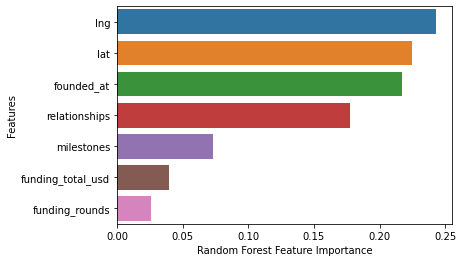

In [16]:
sns.barplot(feature_imp.Importance, feature_imp.Features)
plt.xlabel("Random Forest Feature Importance")

Let's create a final dataset with all the important columns for the next step which is model deployment.

In [17]:
Final_data = X
Final_data['status'] = Y

In [18]:
Final_data

,founded_at,funding_rounds,funding_total_usd,milestones,lat,lng,relationships,status
0,2007,5.0,125371133.0,1.0,30.427755,-9.598107,2.0,1
1,2008,5.0,125371133.0,1.0,22.307159,73.181219,4.0,1
2,2008,5.0,125371133.0,1.0,35.686975,-105.937799,2.0,1
3,2008,5.0,125371133.0,1.0,33.078655,-116.601964,3.0,1
4,2007,5.0,68069200.0,1.0,37.774929,-122.419415,14.0,1
...,...,...,...,...,...,...,...,...
3492,2011,5.0,125371133.0,1.0,37.368830,-122.036350,2.0,1
3493,2011,5.0,125371133.0,2.0,42.387597,-71.099497,8.0,1
3494,2010,5.0,125371133.0,1.0,53.557378,-0.029435,1.0,1
3495,2011,5.0,125371133.0,1.0,11.016844,76.955832,1.0,1


In [19]:
Final_data.to_csv('Final_Data.csv', index=False)

### Saving the Model file


In [20]:
import joblib

In [21]:
joblib.dump(rf_tuned, 'model.joblib')

['model.joblib']